<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.327667,59.887697,94.016128,-0.010152,244.221340,244.225969,-0.004629
1,0.0,1.0,31.725617,43.515248,25.484545,0.005760,110.731171,110.722796,0.008375
2,0.0,2.0,34.649614,80.411027,51.538988,0.005858,176.605487,176.601676,0.003811
3,0.0,3.0,99.436448,56.183740,82.942183,-0.009072,248.553300,248.555495,-0.002195
4,0.0,4.0,26.069442,73.229052,42.420673,0.006375,151.725542,151.720946,0.004597
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.823362,59.417592,86.395078,0.007241,222.643273,222.631615,0.011658
59996,999.0,56.0,34.143818,49.076489,57.339928,0.004095,150.564329,150.554327,0.010003
59997,999.0,57.0,94.858874,81.345593,47.705304,-0.002170,233.907601,233.913655,-0.006054
59998,999.0,58.0,68.876229,85.297923,36.311731,-0.001609,200.484274,200.490636,-0.006362


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    80.327667  59.887697  94.016128 -0.010152  244.221340   
      1.0    31.725617  43.515248  25.484545  0.005760  110.731171   
      2.0    34.649614  80.411027  51.538988  0.005858  176.605487   
      3.0    99.436448  56.183740  82.942183 -0.009072  248.553300   
      4.0    26.069442  73.229052  42.420673  0.006375  151.725542   
...                ...        ...        ...       ...         ...   
999.0 55.0   66.823362  59.417592  86.395078  0.007241  222.643273   
      56.0   34.143818  49.076489  57.339928  0.004095  150.564329   
      57.0   94.858874  81.345593  47.705304 -0.002170  233.907601   
      58.0   68.876229  85.297923  36.311731 -0.001609  200.484274   
      59.0   57.030910  26.270343  50.123513 -0.030122  143.394643   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.225969 -0.004629  
      1.0    110.722796  0.008375  
      2.0    176.601676  0.003811  
      3.0    248.555495 -0.002195  
      4.0    151.720946  0.004597  
...                 ...       ...  
999.0 55.0   222.631615  0.011658  
      56.0   150.554327  0.010003  
      57.0   233.913655 -0.006054  
      58.0   200.490636 -0.006362  
      59.0   143.414748 -0.020104  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    80.327667  59.887697  94.016128 -0.010152  244.221340   
      1.0    31.725617  43.515248  25.484545  0.005760  110.731171   
      2.0    34.649614  80.411027  51.538988  0.005858  176.605487   
      3.0    99.436448  56.183740  82.942183 -0.009072  248.553300   
      4.0    26.069442  73.229052  42.420673  0.006375  151.725542   
...                ...        ...        ...       ...         ...   
999.0 55.0   66.823362  59.417592  86.395078  0.007241  222.643273   
      56.0   34.143818  49.076489  57.339928  0.004095  150.564329   
      57.0   94.858874  81.345593  47.705304 -0.002170  233.907601   
      58.0   68.876229  85.297923  36.311731 -0.001609  200.484274   
      59.0   57.030910  26.270343  50.123513 -0.030122  143.394643   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.225969 -0.004629  
      1.0    110.722796  0.008375  
      2.0    176.601676  0.003811  
      3.0    248.555495 -0.002195  
      4.0    151.720946  0.004597  
...                 ...       ...  
999.0 55.0   222.631615  0.011658  
      56.0   150.554327  0.010003  
      57.0   233.913655 -0.006054  
      58.0   200.490636 -0.006362  
      59.0   143.414748 -0.020104  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.327667,59.887697,94.016128,-0.010152,244.221340,244.225969,-0.004629
1,0.0,1.0,31.725617,43.515248,25.484545,0.005760,110.731171,110.722796,0.008375
2,0.0,2.0,34.649614,80.411027,51.538988,0.005858,176.605487,176.601676,0.003811
3,0.0,3.0,99.436448,56.183740,82.942183,-0.009072,248.553300,248.555495,-0.002195
4,0.0,4.0,26.069442,73.229052,42.420673,0.006375,151.725542,151.720946,0.004597
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.823362,59.417592,86.395078,0.007241,222.643273,222.631615,0.011658
59996,999.0,56.0,34.143818,49.076489,57.339928,0.004095,150.564329,150.554327,0.010003
59997,999.0,57.0,94.858874,81.345593,47.705304,-0.002170,233.907601,233.913655,-0.006054
59998,999.0,58.0,68.876229,85.297923,36.311731,-0.001609,200.484274,200.490636,-0.006362


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    80.327667  59.887697  94.016128 -0.010152  244.221340   
      1.0    31.725617  43.515248  25.484545  0.005760  110.731171   
      2.0    34.649614  80.411027  51.538988  0.005858  176.605487   
      3.0    99.436448  56.183740  82.942183 -0.009072  248.553300   
      4.0    26.069442  73.229052  42.420673  0.006375  151.725542   
...                ...        ...        ...       ...         ...   
999.0 55.0   66.823362  59.417592  86.395078  0.007241  222.643273   
      56.0   34.143818  49.076489  57.339928  0.004095  150.564329   
      57.0   94.858874  81.345593  47.705304 -0.002170  233.907601   
      58.0   68.876229  85.297923  36.311731 -0.001609  200.484274   
      59.0   57.030910  26.270343  50.123513 -0.030122  143.394643   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.225969 -0.004629  
      1.0    110.722796  0.008375  
      2.0    176.601676  0.003811  
      3.0    248.555495 -0.002195  
      4.0    151.720946  0.004597  
...                 ...       ...  
999.0 55.0   222.631615  0.011658  
      56.0   150.554327  0.010003  
      57.0   233.913655 -0.006054  
      58.0   200.490636 -0.006362  
      59.0   143.414748 -0.020104  

[60000 rows x 7 columns]

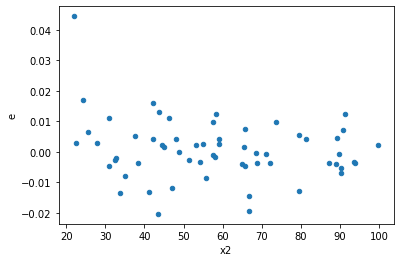

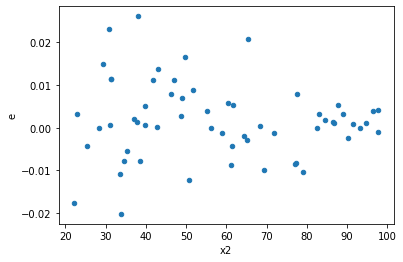

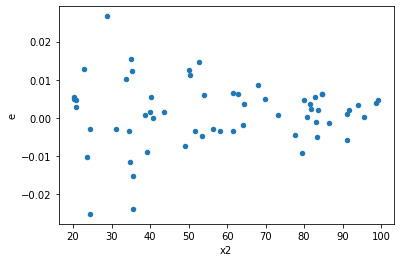

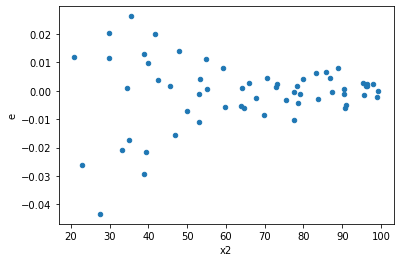

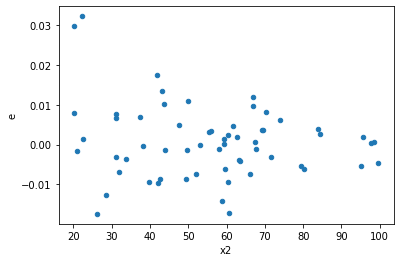

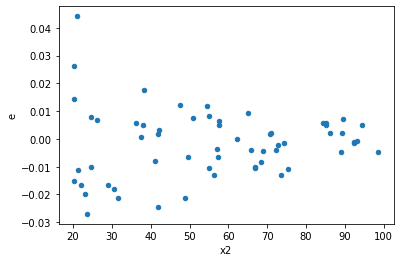

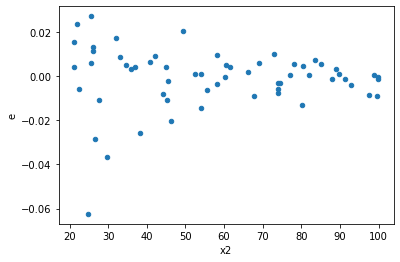

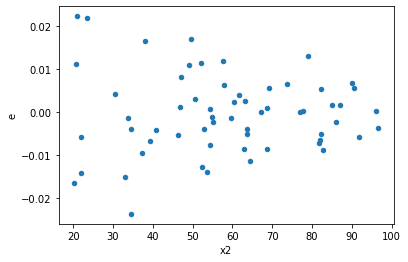

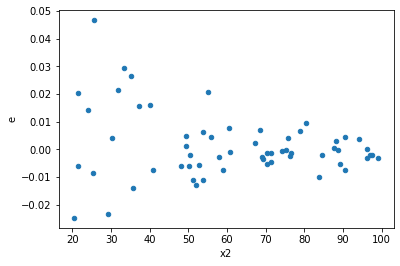

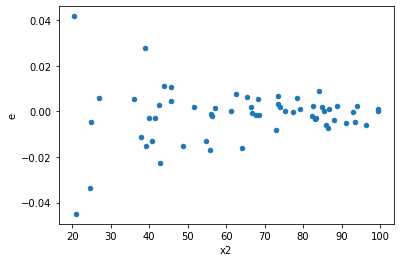

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,28.0,0.0010781625899800148,0.004245489367249103,4.146779192230826e-05,0.00015162462025889654,3.6564430665363603,0.0011229631342579705,0.999438518432871,0.0005614815671289852,Reject005=0 : Heteroscedasticity
1.0,24.0,30.0,0.0006752866512109813,0.004157735225128586,2.8136943800457552e-05,0.00013859117417095286,4.925594448132606,6.06376907621442e-05,0.9999696811546189,3.03188453810721e-05,Reject005=0 : Heteroscedasticity
2.0,28.0,26.0,0.0010680006350369071,0.005732150878848736,3.814287982274668e-05,0.00022046734149418215,5.780039224062611,2.403144783391653e-05,0.999987984276083,1.2015723916958265e-05,Reject005=0 : Heteroscedasticity
3.0,33.0,21.0,0.001825379073303105,0.004502826480762832,5.531451737282136e-05,0.0002144203086077539,3.876383972810522,0.0018378177016558084,0.9990810911491721,0.0009189088508279042,Reject005=0 : Heteroscedasticity
5.0,26.0,28.0,0.0012488056124843193,0.008780702367354561,4.8030985095550745e-05,0.0003135965131198058,6.529046041757224,4.621660230741398e-06,0.9999976891698846,2.310830115370699e-06,Reject005=0 : Heteroscedasticity
7.0,25.0,29.0,0.0013536647325417823,0.0029972767697547895,5.414658930167129e-05,0.00010335437137085482,1.9087882118489166,0.09530896434193004,0.952345517829035,0.04765448217096502,Reject005=1 : Homoscedasticity
8.0,33.0,21.0,0.001751855011023347,0.003924210700960792,5.3086515485555974e-05,0.0001868671762362282,3.5200497626760208,0.003593439891121264,0.9982032800544394,0.001796719945560632,Reject005=0 : Heteroscedasticity
9.0,29.0,25.0,0.0011615238680680764,0.0032690998174513953,4.005254717476126e-05,0.0001307639926980558,3.2648109027246965,0.0036456017184542944,0.9981771991407729,0.0018228008592271472,Reject005=0 : Heteroscedasticity
10.0,17.0,37.0,0.0007034326049366998,0.003723531155767171,4.137838852568823e-05,0.0001006359771828965,2.432090295648426,0.02366640550048138,0.9881667972497593,0.01183320275024069,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,28.0,0.0010781625899800148,0.004245489367249103,4.146779192230826e-05,0.00015162462025889654,3.6564430665363603,0.0011229631342579705,Reject005=0 : Heteroscedasticity
1.0,24.0,30.0,0.0006752866512109813,0.004157735225128586,2.8136943800457552e-05,0.00013859117417095286,4.925594448132606,6.06376907621442e-05,Reject005=0 : Heteroscedasticity
2.0,28.0,26.0,0.0010680006350369071,0.005732150878848736,3.814287982274668e-05,0.00022046734149418215,5.780039224062611,2.403144783391653e-05,Reject005=0 : Heteroscedasticity
3.0,33.0,21.0,0.001825379073303105,0.004502826480762832,5.531451737282136e-05,0.0002144203086077539,3.876383972810522,0.0018378177016558084,Reject005=0 : Heteroscedasticity
4.0,25.0,29.0,0.0066760367448145085,0.0019035675883592776,0.00026704146979258036,6.564026166756129e-05,0.24580549874349544,0.0006548156158263255,Reject005=0 : Heteroscedasticity
5.0,26.0,28.0,0.0012488056124843193,0.008780702367354561,4.8030985095550745e-05,0.0003135965131198058,6.529046041757224,4.621660230741398e-06,Reject005=0 : Heteroscedasticity
6.0,31.0,23.0,0.006948521667485324,0.0009800705104572203,0.00022414586024146205,4.261176132422697e-05,0.19010728673874805,2.8120246754279636e-05,Reject005=0 : Heteroscedasticity
7.0,25.0,29.0,0.0013536647325417823,0.0029972767697547895,5.414658930167129e-05,0.00010335437137085482,1.9087882118489166,0.09530896434193004,Reject005=1 : Homoscedasticity
8.0,33.0,21.0,0.001751855011023347,0.003924210700960792,5.3086515485555974e-05,0.0001868671762362282,3.5200497626760208,0.003593439891121264,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    659
Reject005=1 : Homoscedasticity      341
Name: Result_test, dtype: int64